# 1. 데이터 정리

In [36]:
import pandas as pd
import numpy as np

In [12]:
stb_df = pd.read_csv('../data/starbucks.csv', encoding='utf-8', index_col=0)
stb_df.tail()

,title,address,lat,lng,gu
598,사가정역,서울특별시 중랑구 면목로 310,37.579594,127.087966,중랑구
599,상봉역,서울특별시 중랑구 망우로 307 (상봉동),37.596890,127.086470,중랑구
600,묵동,"서울특별시 중랑구 동일로 952 (묵동, 로프트원 태릉입구역) 1층",37.615368,127.076633,중랑구
601,양원역,서울특별시 중랑구 양원역로10길 3 (망우동),37.606654,127.106360,중랑구
602,중화역,서울특별시 중랑구 봉화산로 35,37.601709,127.078411,중랑구


In [13]:
stb_df.info()
# float형태로 온 것 확인.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 603 entries, 0 to 602
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    603 non-null    object 
 1   address  603 non-null    object 
 2   lat      603 non-null    float64
 3   lng      603 non-null    float64
 4   gu       603 non-null    object 
dtypes: float64(2), object(3)
memory usage: 28.3+ KB


In [14]:
ediya_df = pd.read_csv('../data/ediya.csv', encoding='utf-8', index_col=0)
ediya_df.tail()

,title,address,gu,lat,lng
622,중랑묵동점,"서울 중랑구 동일로 932 (묵동, 묵동자이아파트)",중랑구,37.613779,127.077524
623,중랑역점,서울 중랑구 망우로 198 (상봉동),중랑구,37.593285,127.074889
624,중화동점,서울 중랑구 동일로129길 1 (중화동),중랑구,37.601957,127.086627
625,중화역점,"서울 중랑구 동일로 815, 1층",중랑구,37.603129,127.078889
626,화랑대역점,"서울 중랑구 신내로25가길 2 (묵동, 현동학당)",중랑구,37.619451,127.084160


In [15]:
stb_df['brand'] = '스타벅스'
ediya_df['brand'] = '이디야'

In [25]:
cafe_df = pd.concat([stb_df, ediya_df], axis=0)
cafe_df.tail()

,title,address,lat,lng,gu,brand
622,중랑묵동점,"서울 중랑구 동일로 932 (묵동, 묵동자이아파트)",37.613779,127.077524,중랑구,이디야
623,중랑역점,서울 중랑구 망우로 198 (상봉동),37.593285,127.074889,중랑구,이디야
624,중화동점,서울 중랑구 동일로129길 1 (중화동),37.601957,127.086627,중랑구,이디야
625,중화역점,"서울 중랑구 동일로 815, 1층",37.603129,127.078889,중랑구,이디야
626,화랑대역점,"서울 중랑구 신내로25가길 2 (묵동, 현동학당)",37.619451,127.084160,중랑구,이디야


In [26]:
cafe_df.reset_index(inplace=True)
cafe_df.tail()

,index,title,address,lat,lng,gu,brand
1225,622,중랑묵동점,"서울 중랑구 동일로 932 (묵동, 묵동자이아파트)",37.613779,127.077524,중랑구,이디야
1226,623,중랑역점,서울 중랑구 망우로 198 (상봉동),37.593285,127.074889,중랑구,이디야
1227,624,중화동점,서울 중랑구 동일로129길 1 (중화동),37.601957,127.086627,중랑구,이디야
1228,625,중화역점,"서울 중랑구 동일로 815, 1층",37.603129,127.078889,중랑구,이디야
1229,626,화랑대역점,"서울 중랑구 신내로25가길 2 (묵동, 현동학당)",37.619451,127.084160,중랑구,이디야


In [27]:
del cafe_df['index']
cafe_df.tail()

,title,address,lat,lng,gu,brand
1225,중랑묵동점,"서울 중랑구 동일로 932 (묵동, 묵동자이아파트)",37.613779,127.077524,중랑구,이디야
1226,중랑역점,서울 중랑구 망우로 198 (상봉동),37.593285,127.074889,중랑구,이디야
1227,중화동점,서울 중랑구 동일로129길 1 (중화동),37.601957,127.086627,중랑구,이디야
1228,중화역점,"서울 중랑구 동일로 815, 1층",37.603129,127.078889,중랑구,이디야
1229,화랑대역점,"서울 중랑구 신내로25가길 2 (묵동, 현동학당)",37.619451,127.084160,중랑구,이디야


# 2. 데이터 분석 및 시각화

In [28]:
import platform
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    print("Hangul OK in your MAC!")
    rc("font", family="Arial Unicode MS")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    print("Hangul OK in your Windows!!!")
    rc("font", family=font_name)
else:
    print("Unknown system. sorry.")

Hangul OK in your Windows!!!


In [31]:
# 스타벅스 매장 주요 분포 지역

cafe_df['gu'][cafe_df['brand'] == '스타벅스'].value_counts(ascending=False)[:5]
# 강남구 중구 서초구 영등포구 종로구

강남구     88
중구      53
서초구     49
영등포구    42
종로구     40
Name: gu, dtype: int64

In [33]:
# 이디야 매장 주요 분포 지역

cafe_df['gu'][cafe_df['brand'] == '이디야'].value_counts(ascending=False)[:5]
# 강남구 영등포구 송파구 강서구 마포구

강남구     39
영등포구    39
송파구     34
강서구     31
마포구     30
Name: gu, dtype: int64

In [35]:
# 구별 매장 수
df1 = cafe_df.groupby(['gu', 'brand'])['title'].count().reset_index(name='shop_count')
df1.head()

,gu,brand,shop_count
0,강남구,스타벅스,88
1,강남구,이디야,39
2,강동구,스타벅스,17
3,강동구,이디야,24
4,강북구,스타벅스,6


In [37]:
# 구별 각 브랜드 매장 수(피벗테이블)
df1.pivot_table(index='gu', columns='brand', aggfunc=np.sum)

shop_count    
brand       스타벅스 이디야
gu                  
강남구           88  39
강동구           17  24
강북구            6  13
강서구           25  31
관악구           12  25
광진구           18  22
구로구           14  25
금천구           12  20
노원구           14  23
도봉구            6  22
동대문구          10  24
동작구           11  21
마포구           36  30
서대문구          22  15
서초구           49  28
성동구           14  19
성북구           15  26
송파구           36  34
양천구           17  23
영등포구          42  39
용산구           25  14
은평구           13  25
종로구           40  28
중구            53  29
중랑구            8  28

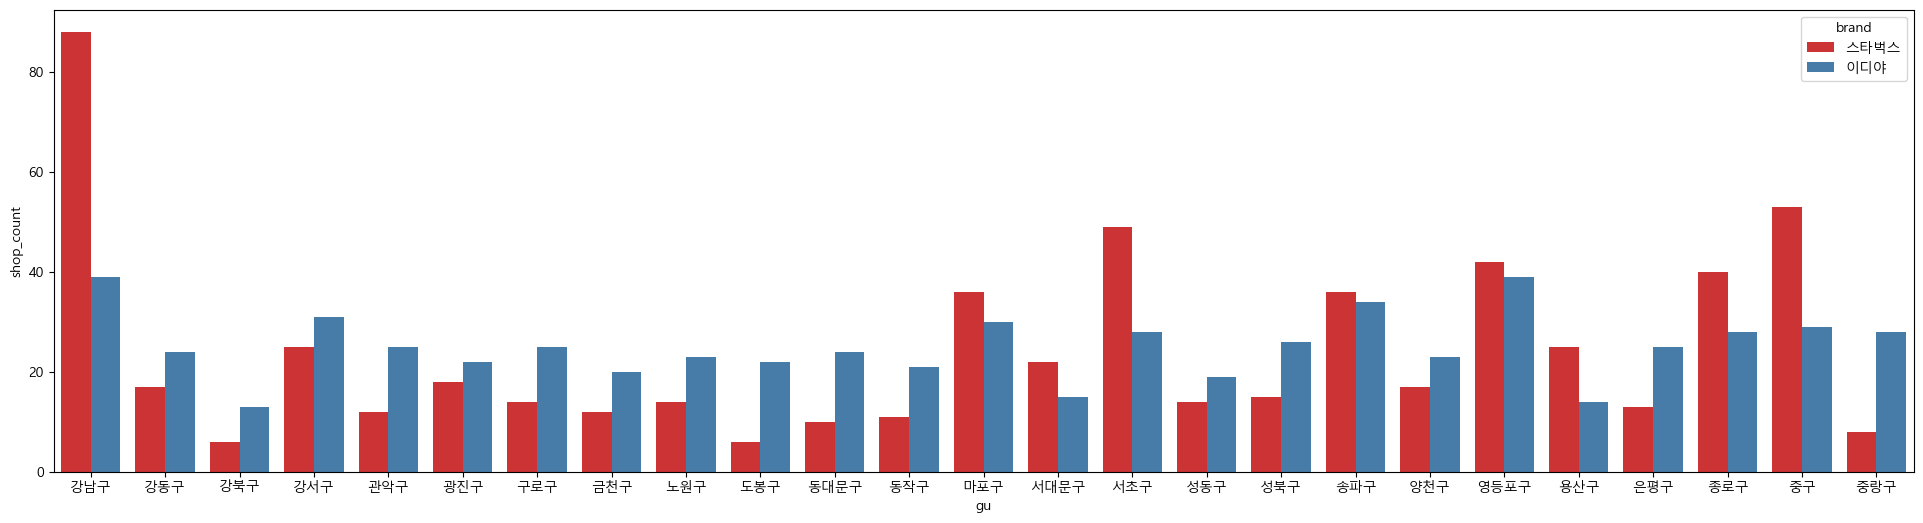

In [38]:
# 구별 매장 수 차이

plt.figure(figsize=(24, 6))
sns.barplot(data=df1, x=df1['gu'], y=df1['shop_count'], hue='brand', palette='Set1')
plt.show()


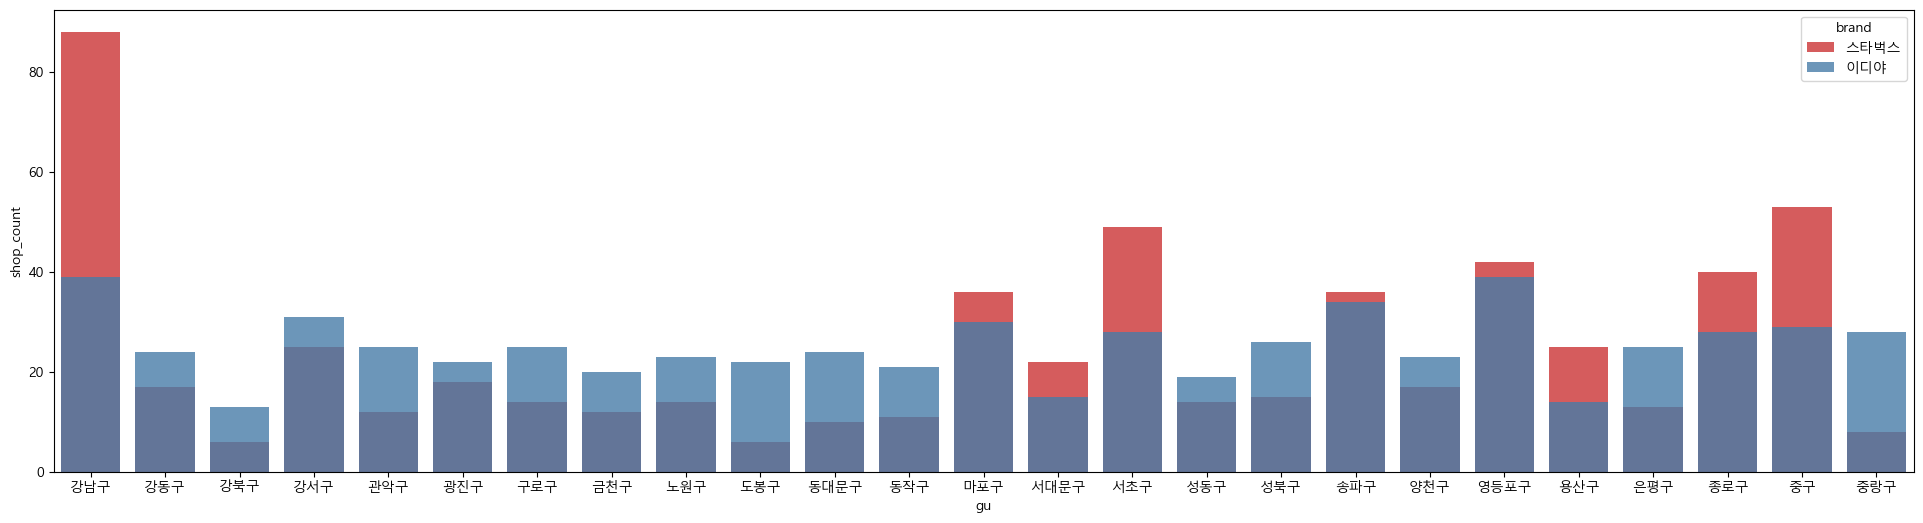

In [39]:
# 구별 매장 수 차이2

plt.figure(figsize=(24, 6))
sns.barplot(data=df1, x=df1['gu'], y=df1['shop_count'], hue='brand', dodge=False, alpha=0.8, palette='Set1')
plt.show()
# 강남구 마포구 서대문구 서초구 송파구 영등포구 용산구 종로구 중구 9개의 구에서 스타벅스가 더 많다.
# 송파구 영등포구는 매장 수가 비슷하다.
# 그외 16개 구는 이디야의 매장이 더 많다.

# 3. 지도 시각화

In [40]:
import folium

In [42]:
# 지도 시각화 데이터 프레임(스타벅스)
stb_df_m = stb_df.groupby(['gu', 'brand'])['title'].count().reset_index(name='shop_count')
stb_df_m = stb_df_m.pivot_table(index='gu')
stb_df_m.head()

C:\Users\fins6\AppData\Local\Temp\ipykernel_37328\4068937516.py:3: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  stb_df_m = stb_df_m.pivot_table(index='gu')


,shop_count
gu,
강남구,88
강동구,17
강북구,6
강서구,25
관악구,12


In [43]:
# 지도 시각화 데이터 프레임(스타벅스)
edi_df_m = ediya_df.groupby(['gu', 'brand'])['title'].count().reset_index(name='shop_count')
edi_df_m = edi_df_m.pivot_table(index='gu')
edi_df_m.head()

C:\Users\fins6\AppData\Local\Temp\ipykernel_37328\2702102524.py:3: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  edi_df_m = edi_df_m.pivot_table(index='gu')


,shop_count
gu,
강남구,39
강동구,24
강북구,13
강서구,31
관악구,25


In [44]:
import json
import folium

geo_path = '../data/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

# 3-1. 스타벅스 매장 지도 시각화

In [45]:
sta_m = folium.Map(location=[37.5502, 126.982], zoom_start=12)
sta_m

In [47]:
c

for idx, rows in stb_df.iterrows():
    folium.Circle(
        location=[rows['lat'], rows['lng']],
        radius=100,
        popup=rows['title'] + "점",
        color = '#2c9147',
        fill_color = '#29147'
    ).add_to(sta_m)

sta_m

c:\Users\fins6\anaconda3\envs\ds_study\lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


# 3-2 이디야 메장 지도 시각화

In [48]:
edi_m = folium.Map(location=[37.5502, 126.982], zoom_start=12)

edi_m.choropleth(
    geo_data = geo_str,
    data = edi_df_m['shop_count'],
    columns = [edi_df_m.index, edi_df_m['shop_count']],
    fill_color = 'PuRd',
    key_on = 'feature.id'
)

for idx, rows in ediya_df.iterrows():
    folium.Circle(
        location=[rows['lat'], rows['lng']],
        radius=100,
        popup=rows['title'] + "점",
        color = '#5882FA',
        fill_color = '#29147'
    ).add_to(edi_m)

edi_m

c:\Users\fins6\anaconda3\envs\ds_study\lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


# 3-3. 스타벅스 + 이디야 매장 지도 시각화(스타벅스 가준)

In [50]:
sta_edi_m = folium.Map(location=[37.5502, 126.982], zoom_start=12)

sta_edi_m.choropleth(
    geo_data = geo_str,
    data = stb_df_m['shop_count'],
    columns = [stb_df_m.index, stb_df_m['shop_count']],
    fill_color = 'PuRd',
    key_on = 'feature.id'
)

for idx, rows in stb_df.iterrows():
    folium.Circle(
        location=[rows['lat'], rows['lng']],
        radius=100,
        popup=rows['title'] + "점",
        color = '#2c9147',
        fill_color = '#29147'
    ).add_to(sta_edi_m)

for idx, rows in ediya_df.iterrows():
    folium.Circle(
        location=[rows['lat'], rows['lng']],
        radius=100,
        popup=rows['title'] + "점",
        color = '#5882FA',
        fill_color = '#29147'
    ).add_to(sta_edi_m)

sta_edi_m

c:\Users\fins6\anaconda3\envs\ds_study\lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


# 4. 분석 결과

- 강남구 마포구 서대문구 서초구 송파구 영등포구 용산구 종로구 중구 9개의 구에서 스타벅스가 더 많다.
- 송파구 영등포구는 매장 수가 비슷하다.
- 그외 16개 구는 이디야의 매장이 더 많다.
---
- 주요 상권, 회사 밀집 지역에서는 스타벅스 매장이 매장이 집중되어 있는 것으로 볼 수 있다.
- 이디야는 주요 상권에서는 스타벅스 매장과 인접했다고 볼 수 있으나, 이것만으로는 스타벅스 옆에 전략적으로 위치한 것으로 판단하기에는 부족하다.
- 이디야는 비교적 서울시 기준으로 했을 떄 더 넓고 고르게 분포되어 있다.
- 결론적으로 이디야는 스타벅스 매장 옆에 위치한 전략을 고수했다고 볼 수 없다.